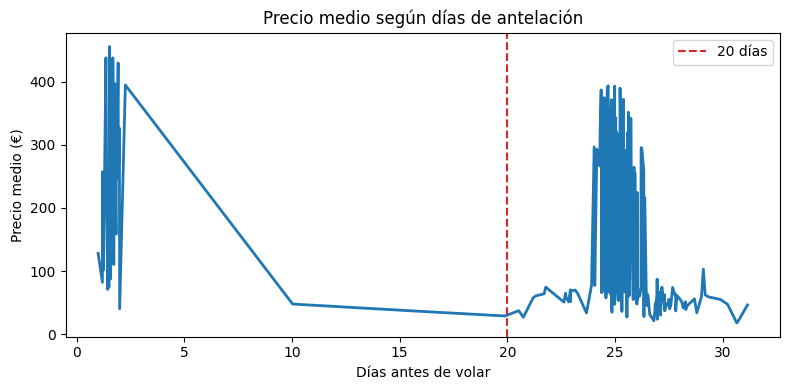

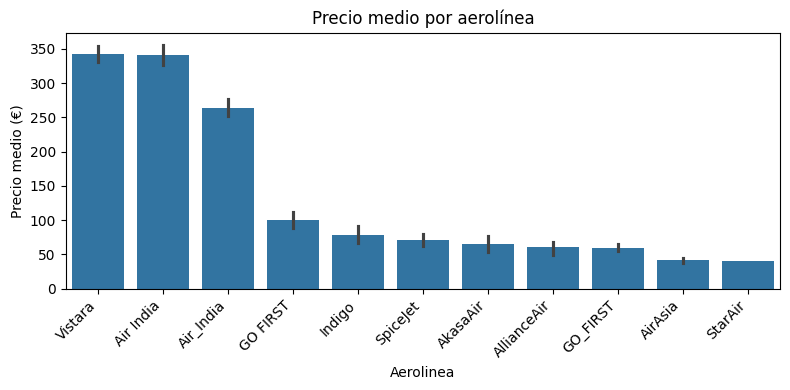

<ipython-input-3-1e17da18bf1f>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


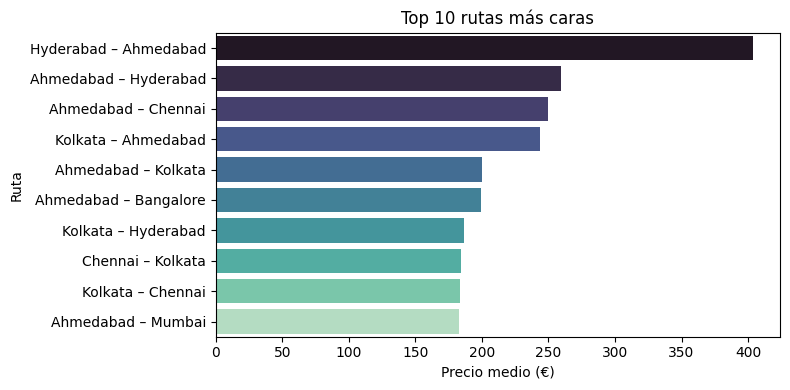

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset procesado
df = pd.read_csv('processed_dataset.csv')

# 1) Precio medio vs. días de antelación
plt.figure(figsize=(8, 4))
# Línea azul como en las gráficas anteriores
sns.lineplot(
    data=df.groupby('Promedio días de antelación')['Precio medio']
           .mean()
           .reset_index(),
    x='Promedio días de antelación',
    y='Precio medio',
    color='#1f77b4',        # mismo azul
    linewidth=2,
)
# Línea vertical roja para el umbral de 20 días
plt.axvline(20, color='#d62728', linestyle='--', label='20 días')
plt.title('Precio medio según días de antelación')
plt.xlabel('Días antes de volar')
plt.ylabel('Precio medio (€)')
plt.legend()
plt.tight_layout()
plt.show()


# 2) Precio medio por aerolínea (barras azules)
plt.figure(figsize=(8, 4))
order = df.groupby('Aerolinea')['Precio medio'] \
          .mean() \
          .sort_values(ascending=False) \
          .index
sns.barplot(
    data=df,
    x='Aerolinea',
    y='Precio medio',
    order=order,
    color='#1f77b4'        # mismo azul
)
plt.xticks(rotation=45, ha='right')
plt.title('Precio medio por aerolínea')
plt.ylabel('Precio medio (€)')
plt.tight_layout()
plt.show()


# 3) Top 10 rutas más caras (paleta "mako" como antes)
df['Ruta'] = df['Origen'] + ' – ' + df['Destino']
top10 = df.groupby('Ruta')['Precio medio'] \
          .mean() \
          .nlargest(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=top10.values,
    y=top10.index,
    palette='mako'         # misma paleta que utilizamos antes
)
plt.xlabel('Precio medio (€)')
plt.title('Top 10 rutas más caras')
plt.tight_layout()
plt.show()

